In [1]:
import sys; sys.path.append('../../')
from DataPreparation.DataPreparation import read_data
from ModelPipelines.ModelAnalysis import recursive_feature_elimination, test_log_linearity, show_hyperparams, vc_dimension_check,validation_curves,learning_curves
from sklearn.linear_model import LogisticRegression
import numpy as np

### Initialize Model

In [2]:
x_data_d, y_data_d = read_data(kind='Numerical')
clf = LogisticRegression(multi_class='multinomial')
clf.fit(x_data_d, y_data_d)

LogisticRegression(multi_class='multinomial')

### Hyperparameters

In [3]:
show_hyperparams(clf)

C,1.0
class_weight,None
dual,False
fit_intercept,True
intercept_scaling,1
l1_ratio,None
max_iter,100
multi_class,multinomial
n_jobs,None
penalty,l2
random_state,None


### VC Dimension

In [4]:
vc_dimension_check(clf, x_data_d)

Model generalization is safe. VC Bound is satisfied where 10dvc=370 < N=1180


### Recursive Feature Elimination

Features to keep ['Age' 'Height' 'Weight' 'Veg_Consump']


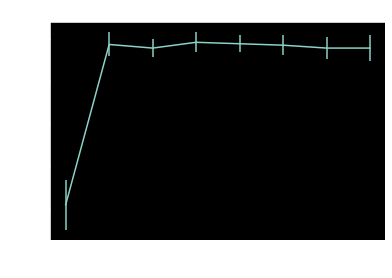

In [5]:
recursive_feature_elimination(clf, min_feats=1, cv=5, x_data_d=x_data_d, y_data_d=y_data_d)

### Test Log-Linearity

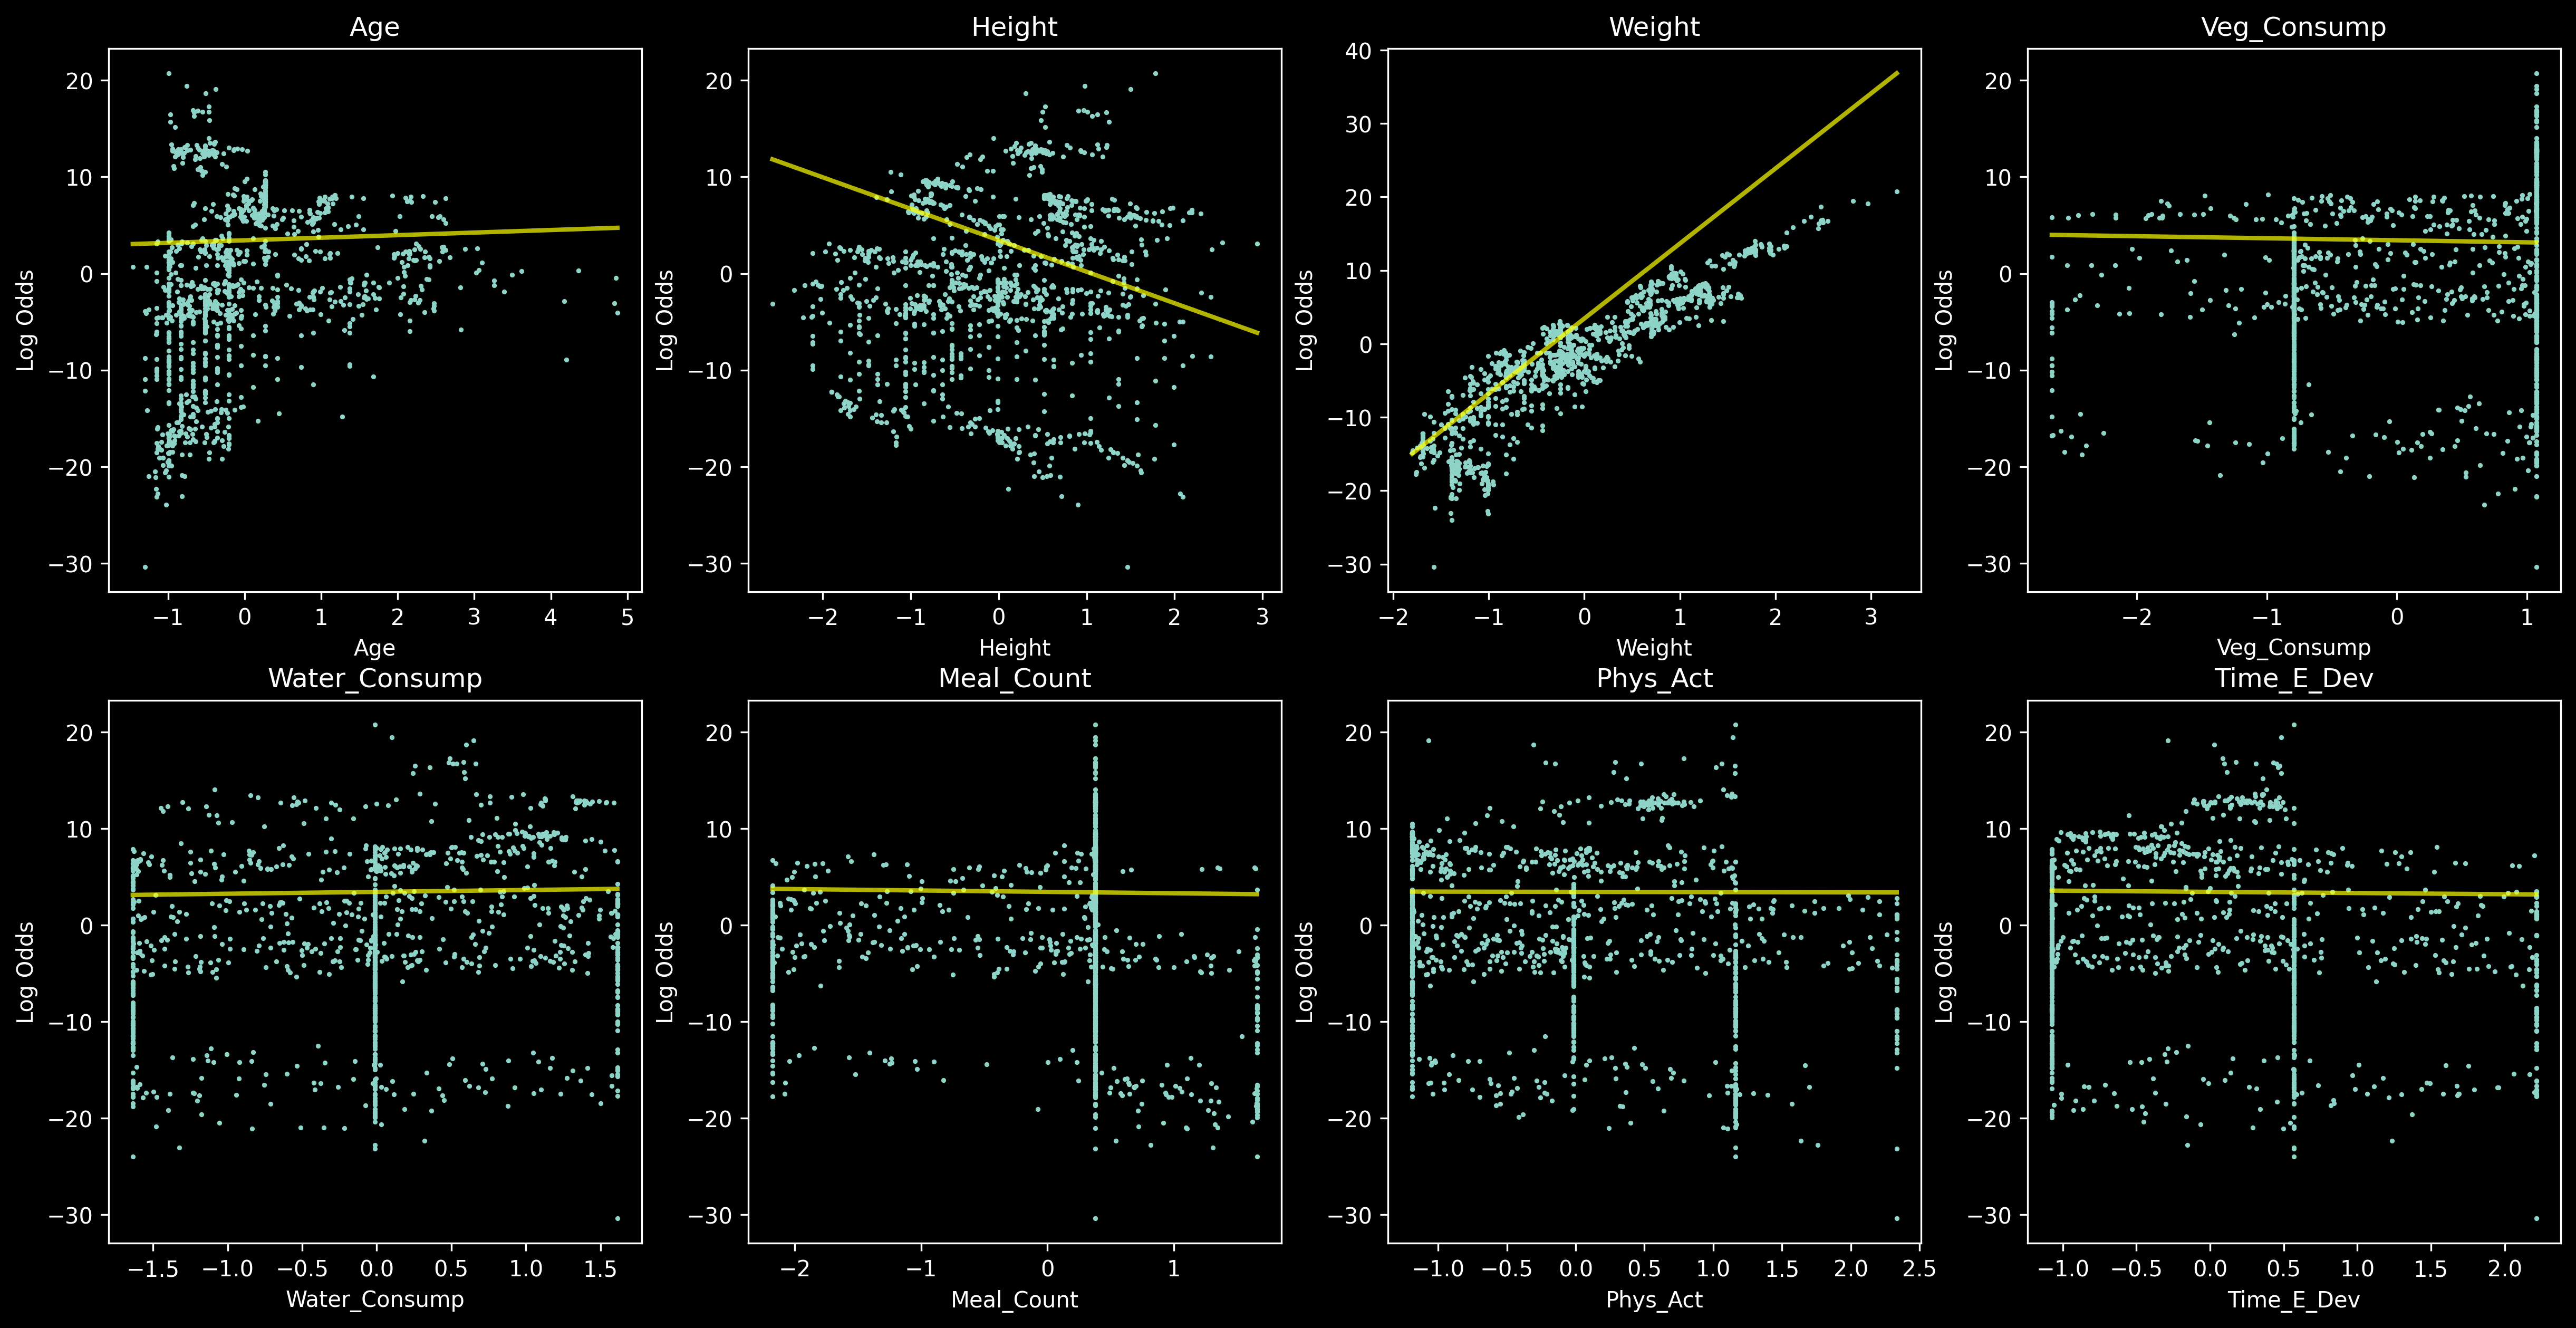

In [6]:
test_log_linearity(clf, class_index=3, x_data_d=x_data_d, y_data_d=y_data_d)

### Validation Curve

Optimal C is around: 92.6530612244898


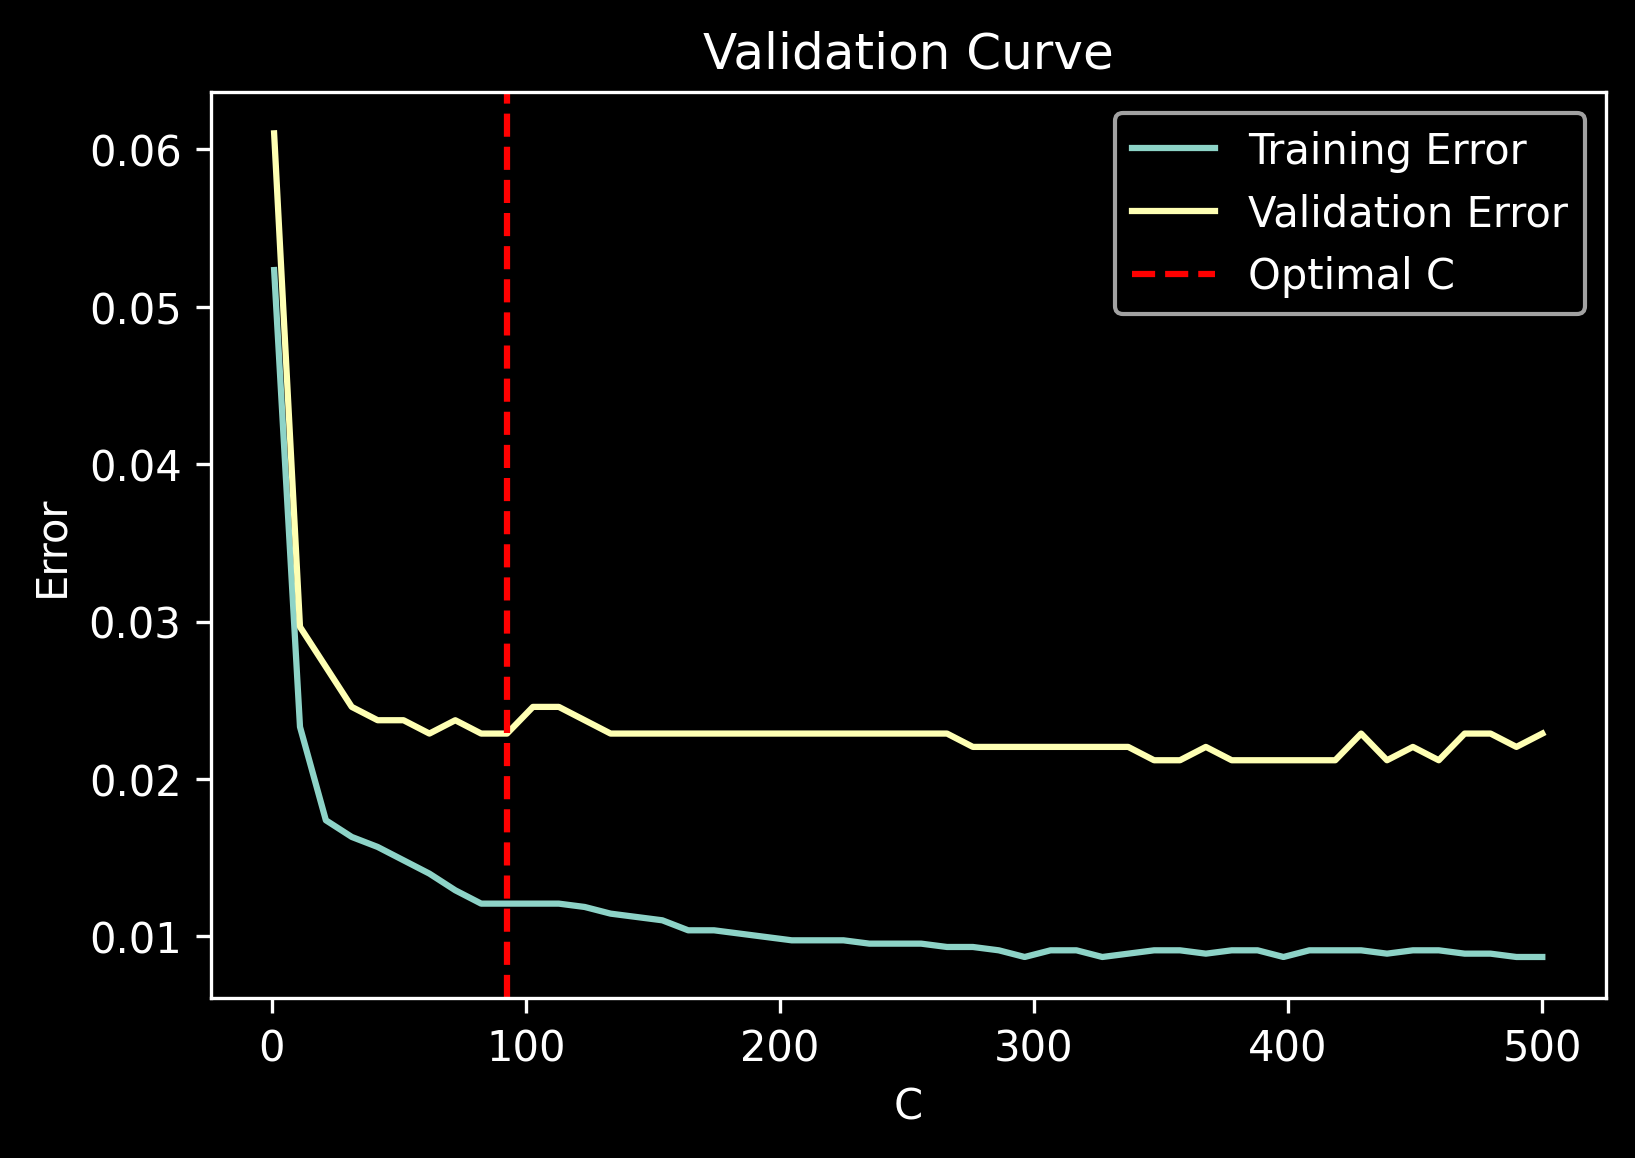

Overfitting measure
newton-cg : 0.008686440677966104
lbfgs : 0.008686440677966104
liblinear : nan
sag : 0.008686440677966104
saga : 0.009533898305084741


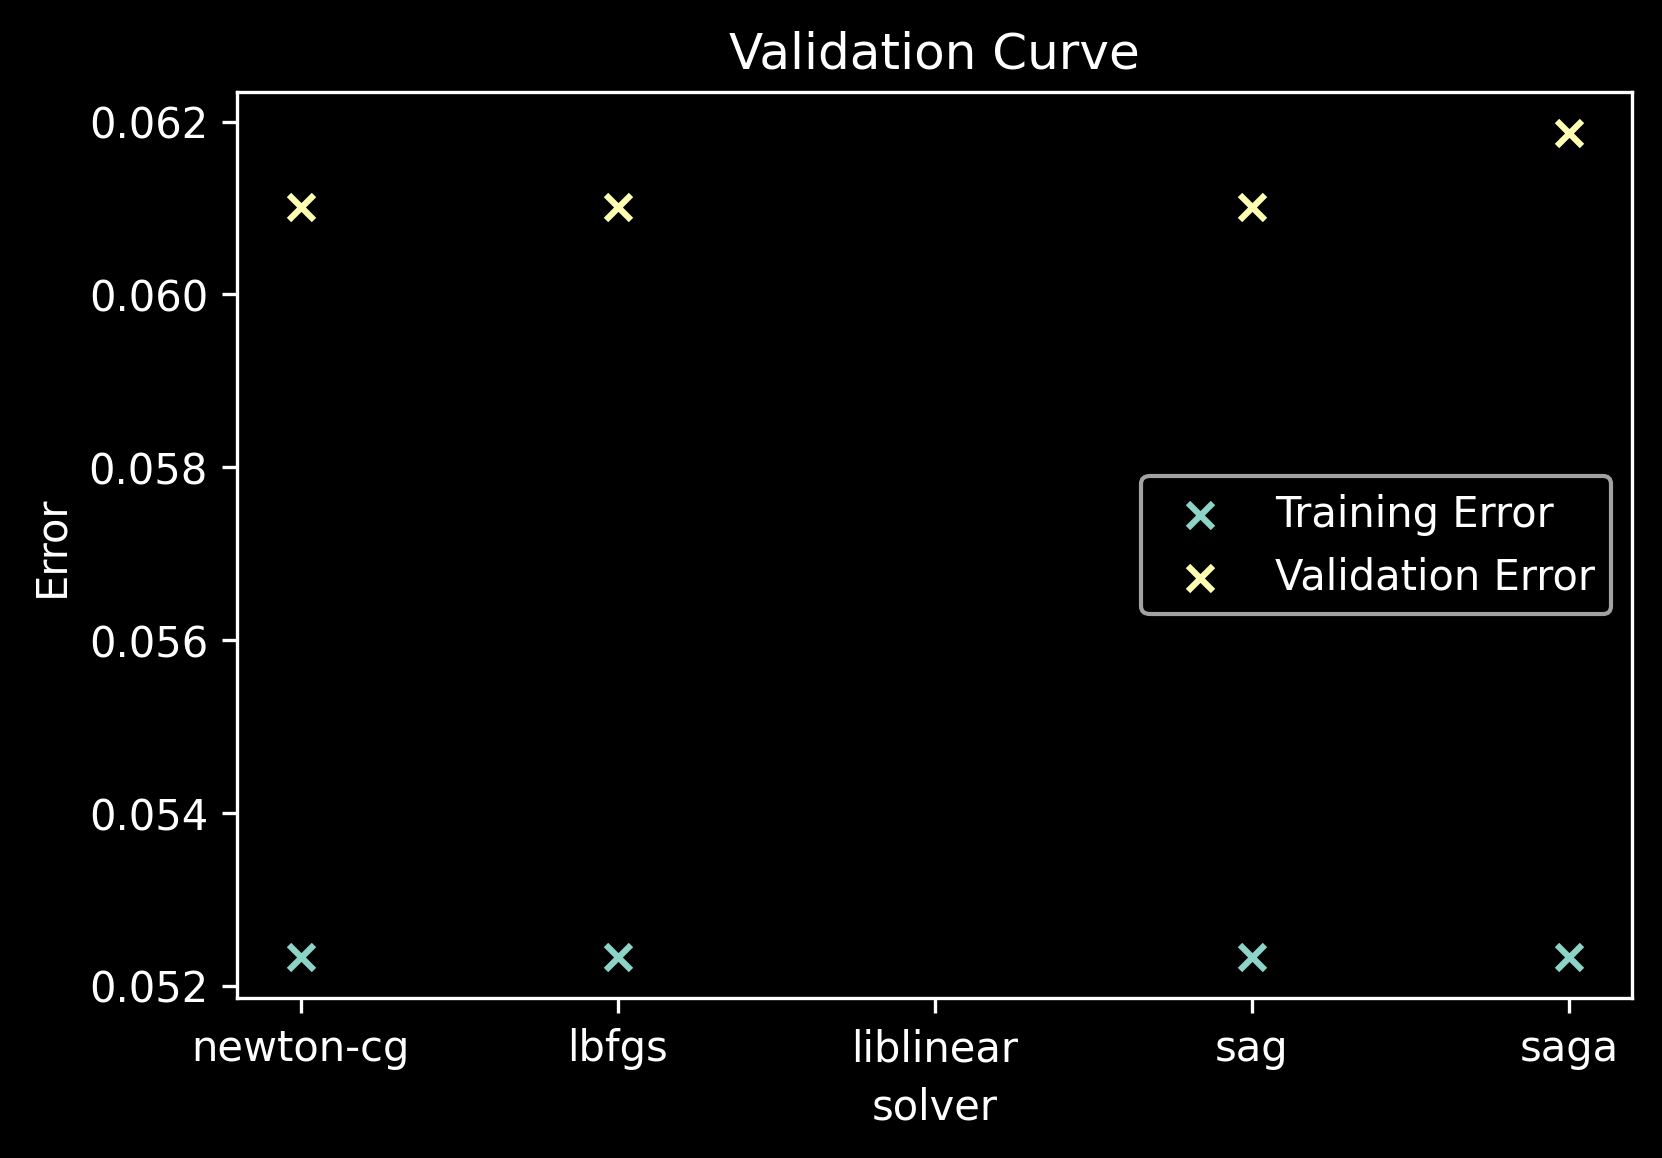

Overfitting measure
l1 : nan
l2 : 0.008686440677966104
elasticnet : nan
none : 0.012923728813559321


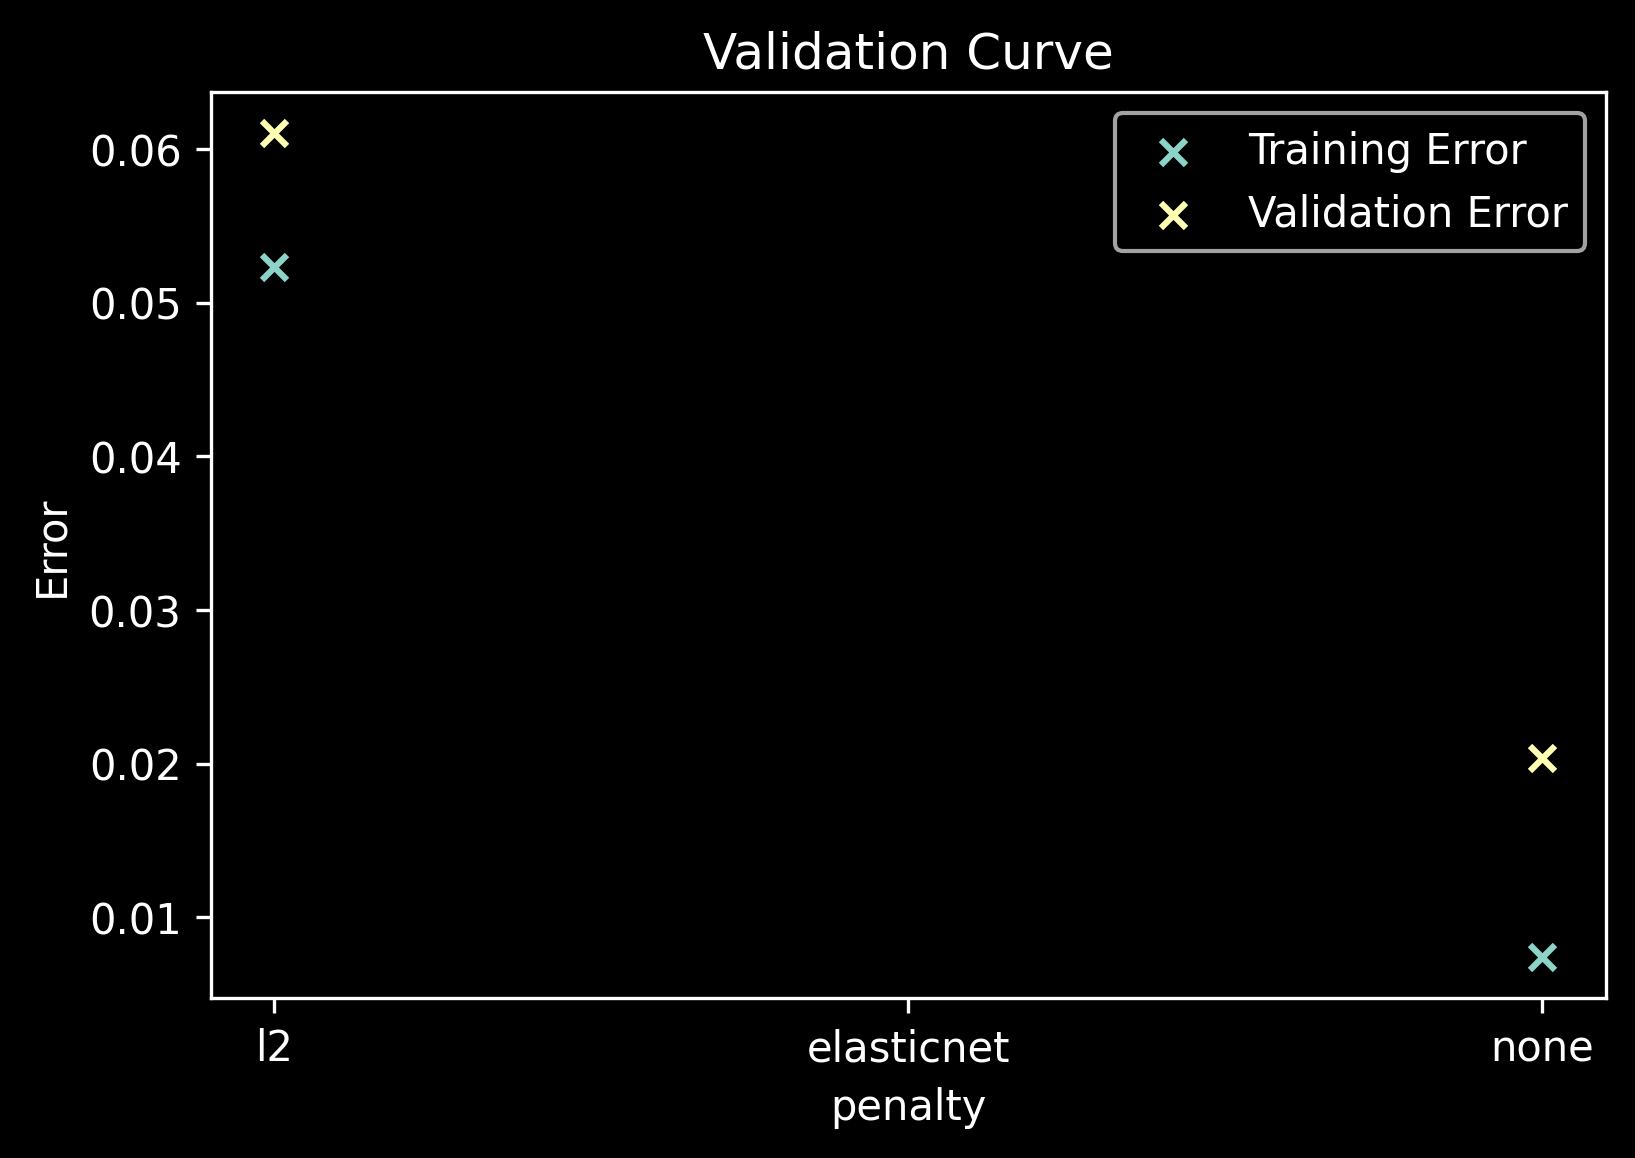

In [7]:
C = np.linspace(1, 500, 50)
validation_curves(clf, x_data_d, y_data_d,5, "C",C)

solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
validation_curves(clf, x_data_d, y_data_d,5, "solver",solver,categorical=True)

penalty = ['l1', 'l2', 'elasticnet', 'none']
validation_curves(clf, x_data_d, y_data_d,5, "penalty",penalty, categorical=True)

### Learning Curve

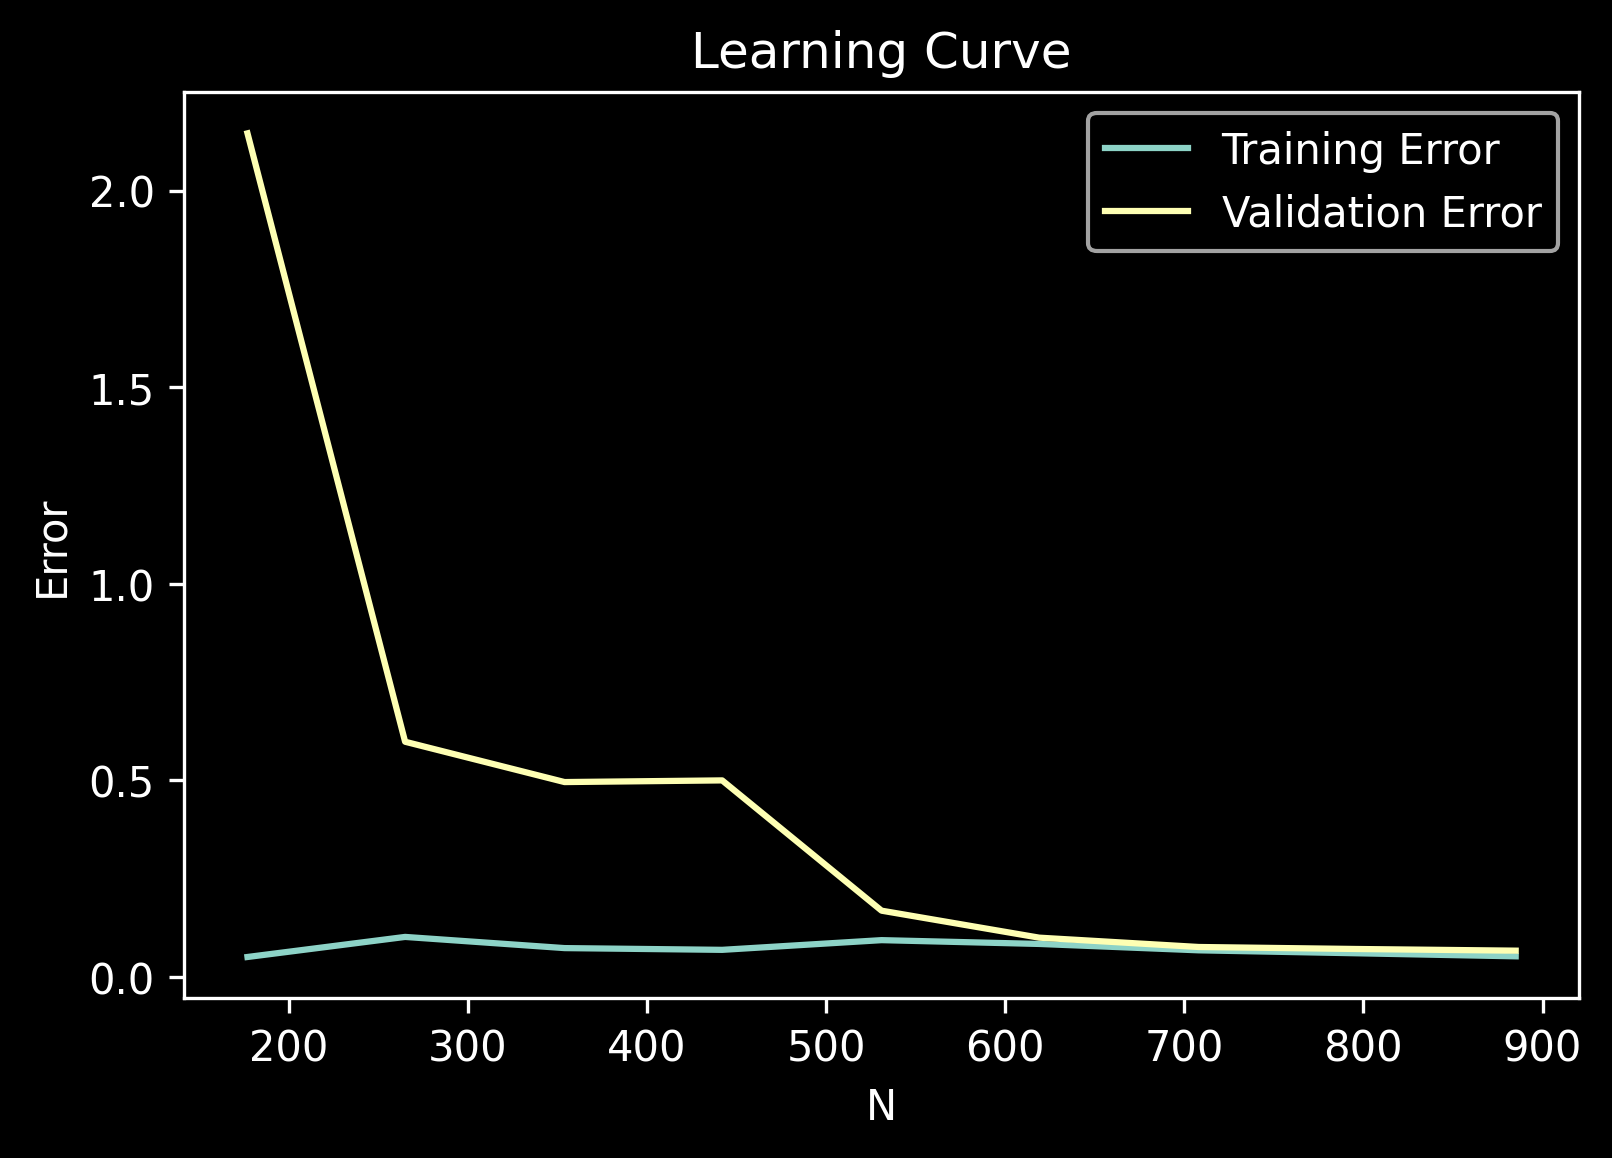

In [8]:
train_sizes=np.linspace(0.1, 1.0, 10)
learning_curves(clf, x_data_d, y_data_d, cv=4,N=train_sizes)